<h1>Mapas mensuales de campos de velocidades</h1>

<h3>Tener en cuenta que las corrientes superficiales en el Mar Caribe son:</h3>
</br>CG - Corriente de Guyana
</br>NEC - Corriente Ecuatorial del Norte
</br>sCC - Corriente del Caribe Sur
</br>nCC - Corriente del Caribe Norte
</br>GPC - Giro Panamá Colombia
</br>CC - Corriente del Caribe


In [1]:
import xarray as xr
import numpy as np
import skimage
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

Importamos la base de datos netCDF y lo agrupamos por meses promediados

In [2]:
ds_currents = xr.open_dataset('..\Data\corrientes_u_v_5m_enero1993_diciembre2020.nc')
ds_monthly = ds_currents.groupby('time.month').mean()
ds_monthly

<xarray.Dataset>
Dimensions:    (depth: 5, latitude: 205, month: 12, longitude: 372)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 5.078
  * latitude   (latitude) float32 7.0 7.083 7.167 7.25 ... 23.83 23.92 24.0
  * longitude  (longitude) float32 -89.92 -89.83 -89.75 ... -59.17 -59.08 -59.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    vo         (month, depth, latitude, longitude) float32 0.1063 ... 0.02531
    uo         (month, depth, latitude, longitude) float32 0.1706 ... -0.002202
Attributes: (12/17)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

Creamos una función para generar mapas

In [3]:
def generar_mapa(data, mes):    
    
    lat = data['latitude'].to_numpy()
    lon = data['longitude'].to_numpy()
    V = data["vo"].mean(dim=["month","depth"]).to_numpy()
    U = data["uo"].mean(dim=["month","depth"]).to_numpy()

    X, Y = np.meshgrid(lon, lat)

    x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
    y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
    u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
    v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)

    # Crea una figura y ejes con la proyección de latitud y longitud
    fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    loc = ticker.MultipleLocator(4)

    # Agrega el mapa base (costas, límites de países, etc.)
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)

    # Genera una capa raster
    R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
            cmap='gist_ncar', origin='lower', vmin=0, vmax=1)


    # Crea el gráfico de vectores
    Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

    # Crea una lista con las longitudes de los puntos
    lat_p = [17.25, 13, 10, 14]
    lon_p = [-74, -73, -77, -80]

    # Usa plt.scatter para crear un gráfico de dispersión con los puntos
    plt.scatter(lon_p, lat_p, color='red', marker='+', s=50)

    # Define las coordenadas y las marcas para los puntos
    lat_c = [11, 14, 13, 17.5, 10, 18]
    lon_c = [-62, -61, -70, -72, -79, -84 ]
    marcas = ['CG', 'NEC', 'sCC', 'nCC', 'GPC', 'CC']

    # Grafica las marcas con las coordenadas correspondientes usando plt.text
    for i, texto in enumerate(marcas):
        ax.text(lon_c[i], lat_c[i], texto, color= "black", fontsize=11, fontweight='bold', ha='center', va='center', transform=ccrs.Geodetic())

    # Agrega una barra de color asociada a la magnitud de los vectores
    plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

    # Establece los límites del mapa y etiquetas de los ejes
    ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))

    # Agrega un marco con las coordenadas
    ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

    # Muestra el mapa
    plt.title(f"Velocidades de Corrientes superficiales de {mes} (1993-2020)")
    plt.show()
    
    fig.savefig("..\Imagenes\Mensual_Promedio\{}.png".format(mes), dpi = 500, bbox_inches = 'tight')

<h1>Enero</h1>

In [4]:
ds_enero = ds_monthly.sel({'month': [1]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


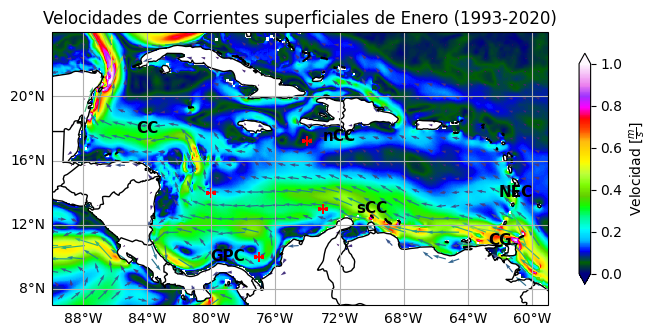

In [5]:
generar_mapa(ds_enero, 'Enero')

<h1>Febrero</h1>

In [6]:
ds_feb = ds_monthly.sel({'month': [2]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


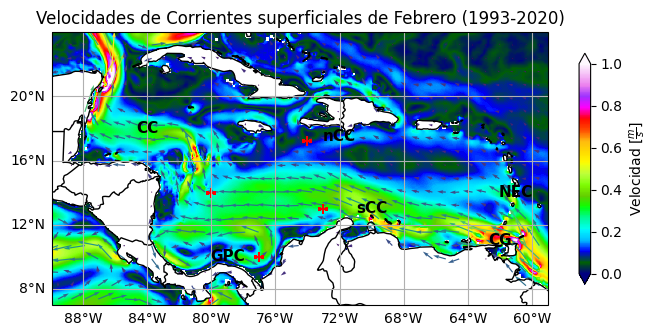

In [7]:
generar_mapa(ds_feb, 'Febrero')

<h1>Marzo</h1>

In [8]:
ds_mar = ds_monthly.sel({'month': [3]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


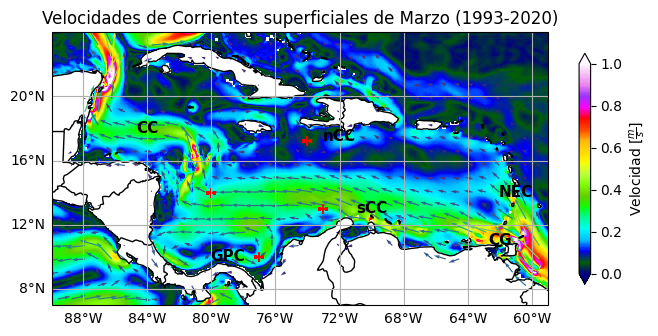

In [9]:
generar_mapa(ds_mar, 'Marzo')

<h1>Abril</h1>

In [10]:
ds_abr = ds_monthly.sel({'month': [4]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


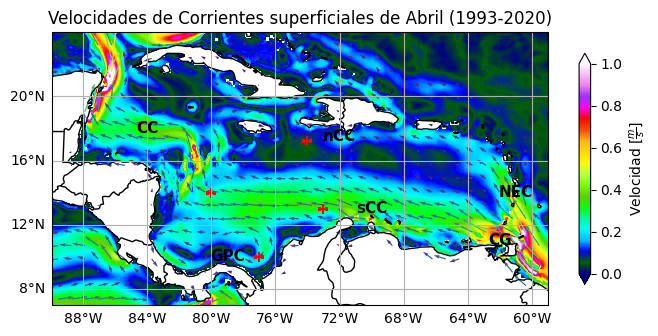

In [11]:
generar_mapa(ds_abr, 'Abril')

<h1>Mayo</h1>

In [12]:
ds_may = ds_monthly.sel({'month': [5]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


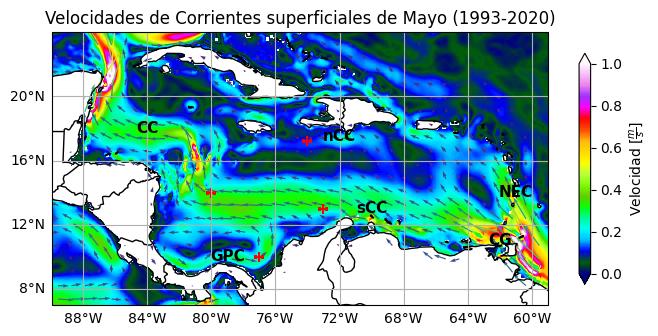

In [13]:
generar_mapa(ds_may, 'Mayo')

<h1>Junio</h1>

In [14]:
ds_jun = ds_monthly.sel({'month': [6]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


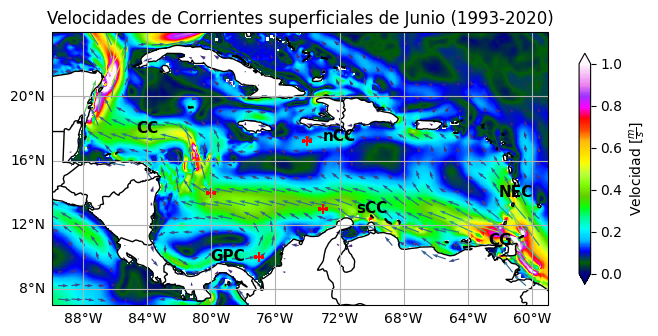

In [15]:
generar_mapa(ds_jun, 'Junio')

<h1>Julio</h1>

In [16]:
ds_jul = ds_monthly.sel({'month': [7]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


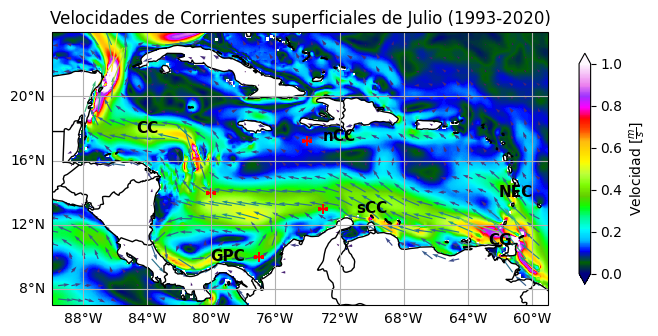

In [17]:
generar_mapa(ds_jul, 'Julio')

<h1>Agosto</h1>

In [19]:
ds_ago = ds_monthly.sel({'month': [8]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


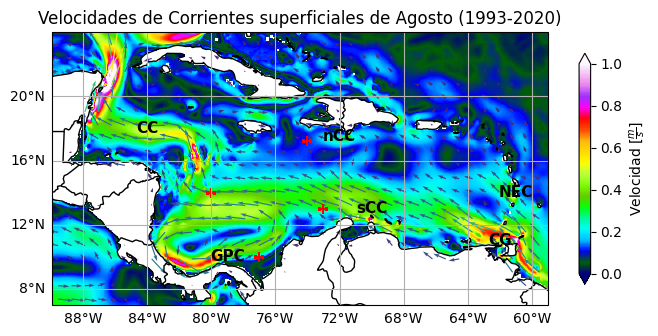

In [20]:
generar_mapa(ds_ago, 'Agosto')

<h1>Septiembre</h1>

In [21]:
ds_sep = ds_monthly.sel({'month': [9]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


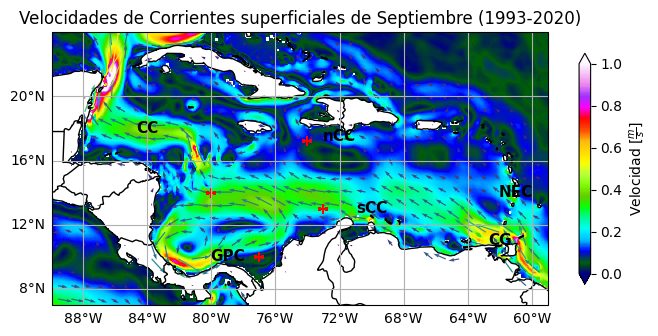

In [22]:
generar_mapa(ds_sep, 'Septiembre')

<h1>Octubre</h1>

In [23]:
ds_oct = ds_monthly.sel({'month': [10]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


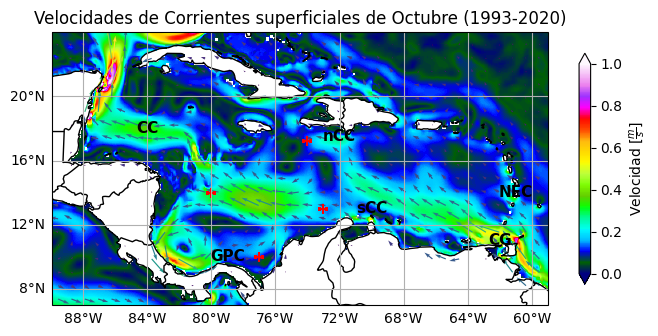

In [24]:
generar_mapa(ds_oct, 'Octubre')

<h1>Noviembre</h1>

In [25]:
ds_nov = ds_monthly.sel({'month': [11]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


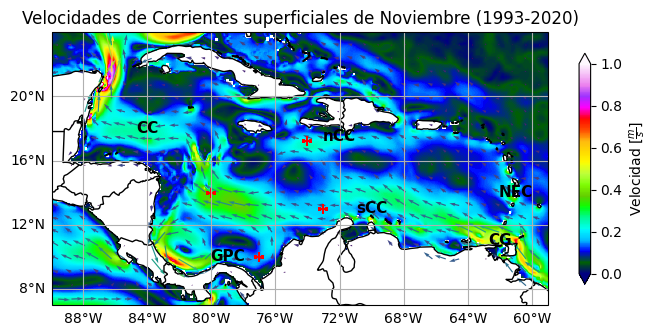

In [26]:
generar_mapa(ds_nov, 'Noviembre')

<h1>Diciembre</h1>

In [27]:
ds_dic = ds_monthly.sel({'month': [12]})

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


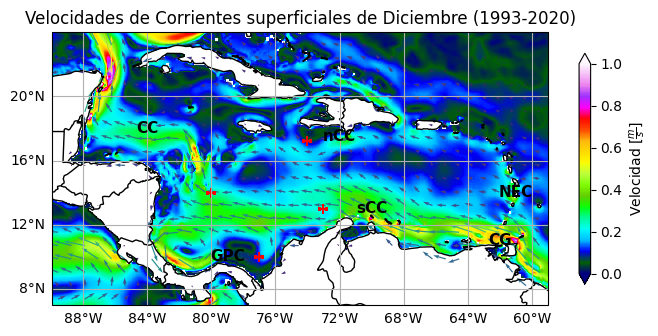

In [29]:
generar_mapa(ds_dic, 'Diciembre')